In [2]:
import numpy as np
import matplotlib.pyplot as plt
import causallearn
from causallearn.utils.cit import *
from causallearn.graph.GraphClass import CausalGraph
import pandas as pd
from itertools import combinations, permutations
from numpy import ndarray
from typing import Dict, List, Tuple
from causallearn.utils.cit import fisherz
import random

Initialize Dataset (Sample num_traj trajectories of length T)

In [3]:
def generate_dataset(num_states, num_inputs):
    beta = 0.6
    A = np.random.normal(0,1, (num_states,num_states))
    B = (np.ones(num_inputs * num_states)*beta).reshape(num_states, num_inputs) 
    T = 2
    num_traj = 10000

    for traj_id in range(num_traj):
        x_0 = np.random.randn()
        x_vec = np.zeros((num_states, T))
        x_vec[:, 0] = x_0
        u_vec = np.random.randn(num_inputs,T)
        #w_vec = np.random.randn(2,T) * np.sqrt(1 - alpha**2 - beta**2)

        for t in range(T-1):
        #     print(t)
            x_vec[:, t+1] = A @ x_vec[:, t] + B @ u_vec[:,t] #+ w_vec[:, t]

        x_u_vec = np.block([x_vec.T, u_vec.reshape((T, num_inputs))])
        x_u_vec = np.block([x_u_vec[:-1, :], x_u_vec[1:, :]])

        if traj_id == 0:
            traj_dataset = x_u_vec
        else:
            traj_dataset = np.block([[traj_dataset], [x_u_vec]])

    traj_dataset = np.array(traj_dataset)
    return traj_dataset

In [44]:
m_sweep = range(49)
num_states = 50
num_inputs = 5
traj_dataset = generate_dataset(num_states, num_inputs)
ground_truth_inputs = [50, 51, 52, 53, 54,105, 106, 107, 108, 109]
num_samples = traj_dataset.shape[0]
num_observations = traj_dataset.shape[1]
input_sets = []
for i in m_sweep:
    input_sets.append(modified_pc(traj_dataset, i, num_samples, num_observations, 0.6))

In [45]:
false_positive = []
del input_sets[0]
for i in input_sets:
    c = sum(el in i for el in ground_truth_inputs)
    false_positive.append((np.size(i)-c) / np.size(i))

Text(0.5, 1.0, 'False Positive Rate, rho_m = 0.6')

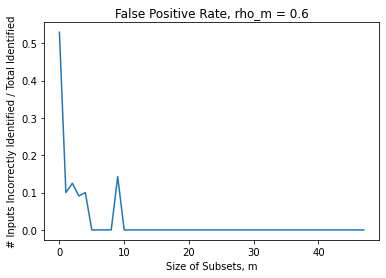

In [46]:
plt.plot(false_positive)
plt.xlabel('Size of Subsets, m')
plt.ylabel('# Inputs Incorrectly Identified / Total Identified')
plt.title('False Positive Rate, rho_m = 0.6')

Text(0.5, 1.0, 'False Positive Rate, rho_m = 0.8')

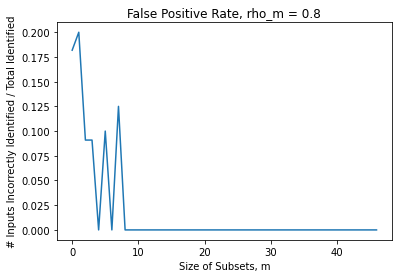

In [39]:
plt.plot(false_positive)
plt.xlabel('Size of Subsets, m')
plt.ylabel('# Inputs Incorrectly Identified / Total Identified')
plt.title('False Positive Rate, rho_m = 0.8')

Text(0.5, 1.0, 'False Positive Rate, rho_m = 0.9')

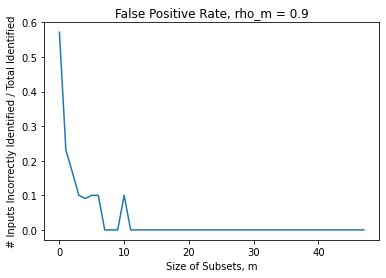

In [41]:
plt.plot(false_positive)
plt.xlabel('Size of Subsets, m')
plt.ylabel('# Inputs Incorrectly Identified / Total Identified')
plt.title('False Positive Rate, rho_m = 0.9')

In [47]:
false_negative = []
for i in input_sets: 
    c = sum(el in i for el in ground_truth_inputs)
    false_negative.append((np.size(ground_truth_inputs) - c) /np.size(ground_truth_inputs))

Text(0.5, 1.0, 'False Negative Rate, rho_m = 0.6')

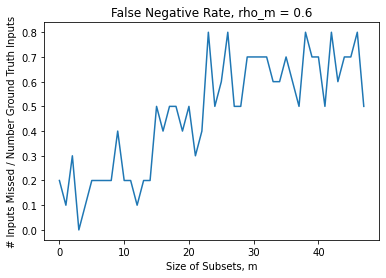

In [48]:
plt.plot(false_negative)
plt.xlabel('Size of Subsets, m')
plt.ylabel('# Inputs Missed / Number Ground Truth Inputs')
plt.title('False Negative Rate, rho_m = 0.6')

Text(0.5, 1.0, 'False Negative Rate, rho_m = 0.8')

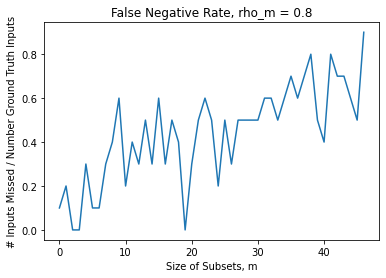

In [38]:
plt.plot(false_negative)
plt.xlabel('Size of Subsets, m')
plt.ylabel('# Inputs Missed / Number Ground Truth Inputs')
plt.title('False Negative Rate, rho_m = 0.8')

Text(0.5, 1.0, 'False Negative Rate, rho_m = 0.9')

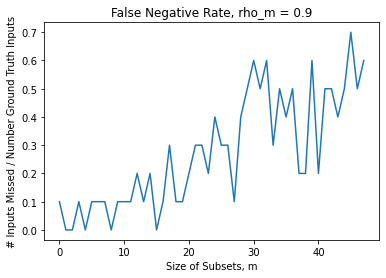

In [43]:
plt.plot(false_negative)
plt.xlabel('Size of Subsets, m')
plt.ylabel('# Inputs Missed / Number Ground Truth Inputs')
plt.title('False Negative Rate, rho_m = 0.9')

Modified PC Algorithm to Learn Number of Inputs

In [4]:
def modified_pc(data, m, num_samples, num_observations, rho_m):
    input_set = []
    for i in range(data.shape[1]):
        subset = np.array(random.sample(list(range(data.shape[1])), m))
        for j in subset:
            rho_m_hat = compute_sample_corr(data, i,j, num_samples)
            if np.abs(rho_m_hat) >= 0.5*rho_m:
                break 
            if j == subset[-1]:
                input_set.append(i)
    return input_set

In [5]:
modified_pc(traj_dataset, 20, num_samples, num_observations, 0.95)

NameError: name 'traj_dataset' is not defined

Helper functions

In [6]:
def compute_sample_corr(data,i,j, num_samples):
    avg_t_plus = (1/num_samples)*data[:,i].sum()
    avg_t = (1/num_samples)*data[:,j].sum()
    diff_t_plus = data[:, i] - avg_t_plus
    diff_t = data[:,j] - avg_t_plus
    diff_t_plus_sq = (diff_t_plus**2).sum()
    diff_t_sq = (diff_t**2).sum()
    corr = (np.dot(diff_t_plus, diff_t))/np.sqrt((diff_t_plus_sq*diff_t_sq))
    return corr